# 实验一：Python语言回顾

<table style="margin: 0 auto; width: 30%; border-collapse: collapse; border: 1px solid black;" data-id="student-info">  
    <colgroup>  
        <col style="width: 35%;">  
        <col style="width: 65%;">  
    </colgroup>  
    <tr>  
        <td style="border: 1px solid black;">班级</td> <td style="border: 1px solid black;">24智能</td>  
    </tr>  
    <tr>  
        <td style="border: 1px solid black;">学号</td> <td style="border: 1px solid black;">未填写</td>  
    </tr>  
    <tr>  
        <td style="border: 1px solid black;">姓名</td> <td style="border: 1px solid black;">未填写</td>  
    </tr>  
    <tr>  
        <td style="border: 1px solid black;">Email</td> <td style="border: 1px solid black;">未填写</td>  
    </tr>  
</table>

## 实验目的

本次实验主要学习和掌握下列内容

- Python简单变量类型: 字符串, 整数, 浮点数, 布尔值
- Python数据结构: list, tuple, dict
- 函数与函数式编程

## Jupyter Notebook使用指导 

1. 首先选择Python内核：在右上角点击Kernel，选择venv(...)。
2. 在编辑后首先要保存，使用Ctrl+S保存。
3. 实验运行出现问题，并且代码正确，一个最常见的解决方法在最上方点击重启(Restart), 然后点击运行所有（Run All）。
4. 如果仍然出现问题，请保存后关闭notebook，然后重复步骤3。

## 实验准备

首先，让我们运行下面的单元格来导入您在此作业中需要的所有包, 并且为实验的代码的测试做准备。

In [1]:
# 导入需要的Python包
from pathlib import Path
import sys
from IPython.display import display, Image

# 获取项目根目录
project_root = Path().resolve().parent
sys.path.append(str(project_root / 'tests'))
sys.path.append(str(project_root / 'util'))

# 导入测试套件和其他工具
from test_suite1 import TestSuite1
from lr_utils import load_dataset
from notebook2pdf import convert_notebook_to_webpdf
from notebook_info_extractor import extract_from_ipynb
from IPython import get_ipython

testsuite1 = TestSuite1()

ip = get_ipython()
notebook_file = None
if '__vsc_ipynb_file__' in ip.user_ns:
    notebook_file = ip.user_ns['__vsc_ipynb_file__']

stu_info = extract_from_ipynb(notebook_file)

print(f"stu_info: {stu_info}")

stu_info: {'class_id': '24智能', 'student_id': '未填写', 'name': '未填写', 'email': '未填写'}


## 实验注意事项

1. 请在指定的地方按照实验指导要求来编写代码。
2. 请按照实验指导要求使用指定的变量名或函数名，不要使用其他的名字。
3. 不要添加任何额外的语句。
4. 不要添加任何额外的代码单元格。
5. 不要在不需要的地方修改作业代码，比如创建额外的变量，修改测试文件中的代码。
6. 实验指导中的`...`表示需要你补充代码的部分，其他部分的代码不用修改。
7. 代码提示中会给出估计的代码行数，例如大约1行代码，估计的代码行数只是一个参考值，实际编写时可能会有出入，请根据实际情况来编写。
8. 请独立完成作业，禁止抄袭，发现抄袭行为成绩记零分

## Python变量

Python变量不用指定类型，解释器会自动推断变量的数据类型

In [2]:
# Python最常用的8种数据类型：
# 基本类型：字符串(str), 整数(int), 布尔(bool), 浮点数(float)
message = 'Hello World!'
numbers = 100
is_true = True
pi = 3.14

# 容器类型： 元组(tuple), 列表(list), 字典(dict), 集合(set)
dimensions = (1920, 1080)
lst = [1, 2, 3, 4, 5]
car = {'brand': 'Honda', 'model': 'Civic'}
letters = {'a', 'b', 'c', 'd', 'e'}

Python不是强类型语言，变量随时可以再被赋予任意类型的值：

In [3]:
message = 3.14
numbers = 'Hello World!'

**变量不是盒子，而是标签**

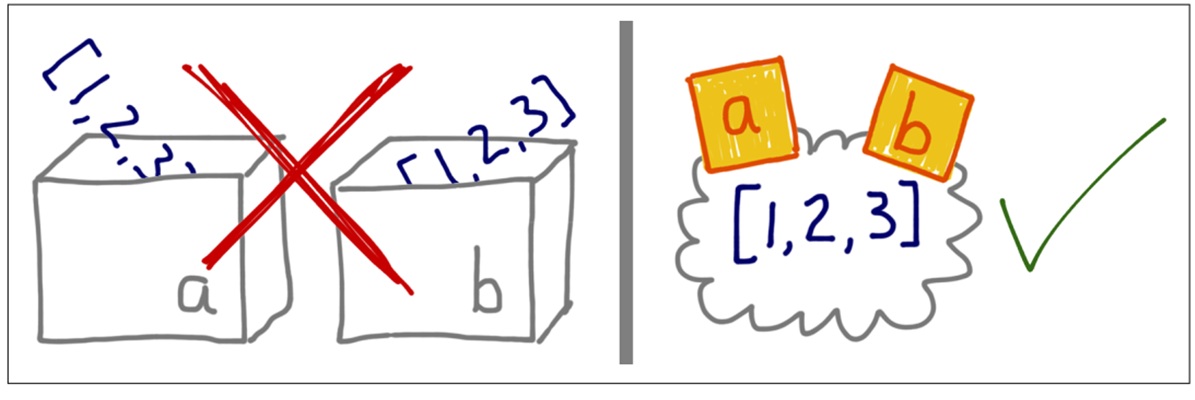

In [4]:
display(Image("./img/2023-08-23-08-33-57.png", width=800, height=600))


盒子和标签关键区别：

1. 变量只是对象的引用（类似于C语言中的指针），而不是存储对象的容器
2. 赋值操作是把标签贴到对象上，而不是把值复制到盒子里
3. 多个变量可以引用同一个对象
4. 对象的生命周期由引用计数决定，而不是作用域


In [5]:
a = 10     # 变量a是一个标签，贴在整数对象10上
b = a      # 创建变量b，也贴在和变量a一样指向的整数对象10上
a = 20     # a贴到整数对象20上，b仍然贴在10上，变量不是盒子，而是标签
print("a =", a)   # 输出20
print("b =", b)   # 输出10

a = 20
b = 10


变量命名规则：
- 使用英语单词(蛇形命名法)： my_message,  first_name
- 变量名称由数字、字母(包括大写字母和小写字母)、下划线组成。
- 变量名不能以数字开头
- 变量名不能用python关键字和内置函数的名字（见下图）
- 变量命名严格区分大小写

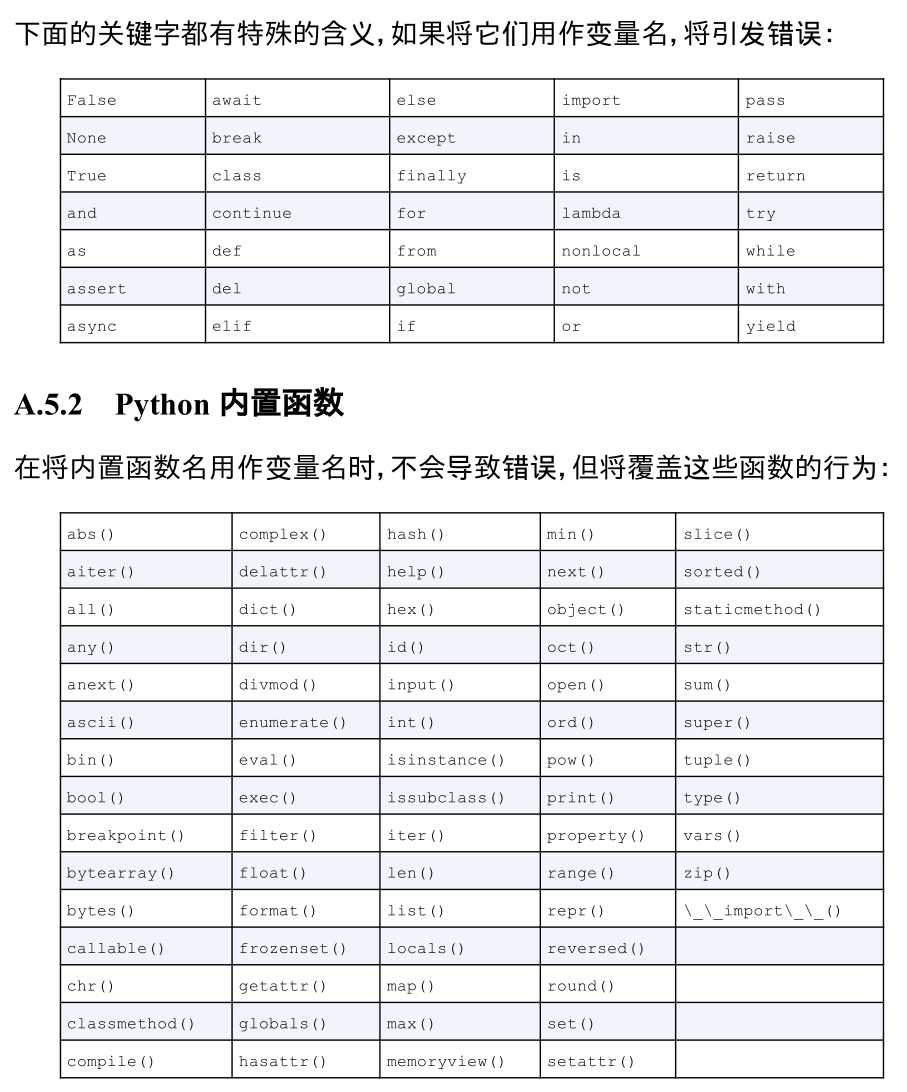

In [6]:
display(Image("./img/2024-12-25-11-28-51.png", width=800, height=600))

## 字符串

字符串就是一系列字符，使用单引号或者双引号扩起来

In [7]:
message = 'hello'
name = "ada lovelace"

Python语言中没有区分字符（char）和字符串（str），字符就是长度为1的字符串

字符串的常见方法：
- title方法：将单词的首字母大写
- 将字符串改为全部大写或者小写: upper(), lower()
- format方法或者f字符串：字符串的格式化
- 字符串中的转义字符：制表符'\t', 换行'\n'
- 删除空白: rstrip(), lstrip(), strip()

f 字符串(Python 3.6+)
- 可以引用 {变量}  

In [8]:
first_name = 'ada'
last_name = 'lovelace'
full_name = f'The first programmer is {first_name.title()} {last_name.title()}'    # f-->format
print(full_name)

The first programmer is Ada Lovelace


format方法

In [9]:
full_name = '{} {}'.format(first_name, last_name)
print(full_name)

ada lovelace


连接字符串，使用`+`可以连接字符串。

In [10]:
first_name = "James"
last_name = "Bond"
full_name = first_name + " " + last_name
print(full_name)

James Bond


重复字符串， 使用`*`可以重复字符串任意次数

In [11]:
msg =  "MayDay!"
msg * 10

'MayDay!MayDay!MayDay!MayDay!MayDay!MayDay!MayDay!MayDay!MayDay!MayDay!'

字符查找和替换

In [12]:
text = "Hello World Python"

# 查找
print(text.find("Woooorld"))     # 6 (返回索引，找不到返回-1)
print(text.index("World"))    # 6 (找不到会抛异常)
print(text.count("o"))        # 3 (计数)

# 判断
print(text.startswith("Hello"))  # True
print(text.endswith("Python"))   # True
print("World" in text)           # True

# 替换
replaced_txt = text.replace("World", "Python")  # "Hello Python Python"
print(replaced_txt)

-1
6
3
True
True
True
Hello Python Python


分割和连接字符串

In [13]:
# split() 将字符串分割成列表

# 例1：用空格分割
text = "apple banana cherry"
fruits = text.split()  # 默认按空格分割
print(fruits)  # ['apple', 'banana', 'cherry']

# 例2：用逗号分割
data = "张三,25,北京"
info = data.split(',')
print(info)  # ['张三', '25', '北京']

# 例3：用其他分隔符
email = "user@example.com"
parts = email.split('@')
print(parts)  # ['user', 'example.com']

['apple', 'banana', 'cherry']
['张三', '25', '北京']
['user', 'example.com']


In [14]:
# join() 将列表元素连接成字符串

# 例1：用空格连接
words = ['Hello', 'world', '!']
sentence = ' '.join(words)
print(sentence)  # "Hello world !"

# 例2：用逗号连接
names = ['张三', '李四', '王五']
name_list = ', '.join(names)
print(name_list)  # "张三, 李四, 王五"

Hello world !
张三, 李四, 王五


## 习题一

习题1：用户信息格式化，编写函数 format_user_info(user_data)，处理输入的用户数据。

- 输入: "first_name,  last_name,email,age" 格式的字符串
- 输出: 三个值 - formatted_info, email_domain, initials

- 输出格式:
    - formatted_info: "Name: [First] [Last], Age: [age], Email: [email]"
    - email_domain: 邮箱@后面的域名部分
    - initials: "[F].[L]." 格式的姓名缩写

示例:
- 输入: "john, doe , John.Doe@Gmail.COM, 25"
- 输出:
"Name: John Doe, Age: 25, Email: john.doe@gmail.com",
"gmail.com" , "J.D."
- 请注意上面字符串内的逗号和冒号后面都有空格

In [15]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: format_user_info
def format_user_info(user_data):
    """
    格式化用户信息字符串

    参数:
    user_data: 字符串，格式为 " first_name ,  last_name  ,  email@abc.com ,  age"
    , 注意字符串开始结束以及逗号的前后有可能有空格, 请注意使用strip()函数去掉空格

    返回:
    formatted_info: 格式化后的用户信息字符串
    email_domain: 邮箱域名部分
    initials: 用户姓名首字母缩写 (如: "J.D.")
    """


    # 大约需要10-12行代码，主要使用字符串方法：split(), strip(), title(), lower(), upper(), replace(), join()等

    # 你编写的代码从这里开始
    # 解析用户数据
    parts = ...           # 使用split()分割字符串

    # 提取各个字段并处理
    first_name = ...      # 提取名字并转换为标题格式
    last_name = ...       # 提取姓氏并转换为标题格式
    email = ...           # 提取邮箱并转换为小写
    age = ...             # 提取年龄并转换为整数

    # 格式化输出
    formatted_info = ...  # 使用f-string创建格式化信息
    email_domain = ...    # 提取邮箱域名部分（@后面的部分）
    initials = ...        # 创建姓名首字母缩写，格式：F.L.

    # 你编写的代码到这里结束

    return formatted_info, email_domain, initials

In [16]:
# 测试习题1
testsuite1.test_format_user_info(format_user_info)

测试失败 test_format_user_info: 格式化信息错误:期望 'Name: John Doe, Age: 25, Email: john.doe@gmail.com', 得到 'Ellipsis'


## 数与数学运算


- 整数（`int`）： 没有区分长度（没有int32， int64，long），从Python 3.8开始没有最大值的限制
- 浮点数(`float`): 没有区分单精度和双精度
- `int`和`float`的实际长度会根据机器平台来决定，绝大多数情况下为64位，8个字节
- 这里讲解的所有的运算都可以使用整数和浮点数来进行

基本运算

- 基本运算加减乘除所使用的运算符： +, -, *, /
- 乘方运算: **

In [17]:
3 ** 3

27

In [18]:
2.25 ** .5  # 指数也可以是小数，指数0.5表示开平方

1.5

In [19]:
0 ** 0  # 比较特殊的运算结果：0的0次方是1

1

模运算： % （得到余数）

In [20]:
5 % 3

2

`%1` 可以获取一个浮点数的小数部分

In [21]:
67.14 % 1  # 浮点数的运算不是完全精确的

0.14000000000000057

In [22]:
3.14159 % .1

0.04158999999999971

除法求整数商: `//`

In [23]:
8 // 3

2

`// 1`可以去掉一个浮点数的小数部分

In [24]:
5.25 // 1

5.0

求商和余数： `divmod`函数

In [25]:
divmod(20, 3)

(6, 2)

`round`函数: 浮点数四舍五入

In [26]:
round(.6666)

1

In [27]:
round(1.2)

1

In [28]:
# round(0.5)得到0
round(.50000)

0

为什么浮点数运算不精确相等，例如0.3+0.1+0.2不等于0.6？

因为所有的浮点数（十进制）在计算机中都是以二进制的形式存储的，而二进制浮点数无法精确表示大部分的十进制小数，例如0.1在二进制中是一个无限循环小数，所以在计算机中0.1的存储是一个近似值。

In [29]:
.3 + .1 + .2 == .6

False

打印0.3，0.2，0.1 的近似值，精确到小数点后20位。

In [30]:
print(f'{.3:.20f}')
print(f'{.2:.20f}')
print(f'{.1:.20f}')
print(f'{.6:.20f}')

0.29999999999999998890
0.20000000000000001110
0.10000000000000000555
0.59999999999999997780


## 习题二

求离整数n最近的平方数

例如，如果n=111，那么nearest_sq(n)等于121，因为111比100（10的平方）更接近121（11的平方）。

如果n已经是完全平方（例如n=144，n=81，等等），你需要直接返回n。

In [31]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: nearest_sq
def nearest_sq(n):
    # 大约1到2行代码, 不能超过2行代码
    # 你编写的代码从这里开始
    result = ...

    # 你编写的代码到这里结束
    return result

In [32]:
# 测试习题2
testsuite1.test_nearest_sq(nearest_sq)

测试失败 test_nearest_sq: 1的最近完全平方数应为1, 得到Ellipsis


## 简单变量类型

### 字符串和数字之间的转化

- str()函数：将其他数据转化为字符串
- int()函数：将其他数据转化为整数
- float()函数：将其他数据转化为浮点数

In [33]:
str1 = str(123)
str1

'123'

In [34]:
int1 = int('123')
int1

123

In [35]:
# 下面的代码会出错，因为'123.4'不是一个整数
# int2 = int('123.4')
# int2

In [36]:
f1 = float('123.4')
f1

123.4

In [37]:
f2 = float('123')
f2

123.0

三个关于变量的函数
- type函数: 返回该变量的类型
- id函数： 返回该变量的id，这是一个int类型的值
- isinstance函数：如果该变量是某类型的实例，返回True，否则返回False

In [38]:
message = "Hello"
number = 42
pi = 3.14159

In [39]:
print(id(message), id(number), id(pi), sep=", ")

5174073584, 4397526744, 5173827792


In [40]:
print(type(message), type(number), type(pi), sep=', ')

<class 'str'>, <class 'int'>, <class 'float'>


In [41]:
print(isinstance(message, str), isinstance(number, int), isinstance(pi, float),sep=', ')

True, True, True


### 简单变量的值是不可变的

简单类型变量的值（str,int,float, bool）都是不可变的，如果进行改变简单变量的操作，实际上是创建了新的变量（变量不是盒子，而是标签）

In [42]:
number = 42
print(id(number))
number = 100
print(id(number))

4397526744
4397528600


数字`42`这个值在内存堆中是不能被改变的，它的id可以看作是保存值的内存的地址，如果没有变量引用这个id的值，内存堆中的值将被垃圾回收。

### `is` 和 `==`

`is` 和 `==`的区别：

- `is`比较的是两个变量的id是否相等
- `==`比较的是两个变量的值是否相等

运行下面的代码，思考为什么会这样？总结一下在哪些情况下两个不同的变量会有相同的id？

In [43]:
a = 256
b = 256
print(id(a), id(b))
print(a is b)

4397533592 4397533592
True


In [44]:
a = 257
b = 257
print(id(a), id(b))
print(a is b)

5173828976 5173828912
False


In [45]:
a = -5
b = -5
print(id(a), id(b))
print(a is b)

4397525240 4397525240
True


In [46]:
a = -6
b = -6
print(id(a), id(b))
print(a is b)

5173829008 5173829168
False


从-5到256的整数字面量(literal)作为被常用的整数会被缓存起来，这些整数的id总是相同的

In [47]:
# 简单字符的字符串也会被缓存
a = 'helloworld123'
b = 'helloworld123'
print(id(a), id(b))
print(a is b)

5174291248 5174291248
True


In [48]:
# 因为字符串中有空格，这不是一个简单字符串，不会被缓存
a = 'hello world'
b = 'hello world'
print(id(a), id(b))
print(a is b)

5174294384 5174294448
False


In [49]:
a = 'hello'
b = 'he'
b += 'llo'
print(id(a), id(b))
print(a is b)

4427259632 5100996144
False


In [50]:
a = tuple()
b = tuple()
print(id(a), id(b))
print(a is b)

4397599696 4397599696
True


## 列表(list)

- 列表由一系列特定顺序(sequence)排列的元素组成。
- 在Python中，用方括号[ ] 表示列表，用逗号分隔其中的元素。
- 有索引： 从0开始
- 最后一个元素后面的逗号会被忽略。 

与简单变量(str,int,float)不同：

- 列表是可变的
- 可以修改列表中的元素
- 可以添加和删除列表中的元素。

通过索引查找或者修改元素，在Python中索引还可以是负数，-1表示最后一个元素，-2表示倒数第二个元素，以此类推。

In [51]:
motorcycles = ['honda', 'yamaha', 'suzuki', ]
motorcycles[0] = 'ducati'
print(motorcycles)
print(motorcycles[-1])

['ducati', 'yamaha', 'suzuki']
suzuki


在末尾附加元素：append方法

In [52]:
motorcycles = ['honda', 'yamaha', 'suzuki', ]
motorcycles.append('ducati')
print(motorcycles)

['honda', 'yamaha', 'suzuki', 'ducati']


在列表中插入元素： insert方法

In [53]:
motorcycles = ['honda', 'yamaha', 'suzuki', ]
motorcycles.insert(0, 'ducati')
print(motorcycles)

['ducati', 'honda', 'yamaha', 'suzuki']


使用del语句删除元素

In [54]:
motorcycles = ['honda', 'yamaha', 'suzuki', ]
del motorcycles[0]
print(motorcycles)

['yamaha', 'suzuki']


pop语句删除列表末尾的元素并返回元素值

In [55]:
motorcycles = ['honda', 'yamaha', 'suzuki', ]
print(motorcycles)

popped_motorcycle = motorcycles.pop()
print(motorcycles)
print(popped_motorcycle)

['honda', 'yamaha', 'suzuki']
['honda', 'yamaha']
suzuki


remove方法根据值删除列表中的元素

In [56]:
motorcycles = ['honda', 'yamaha', 'suzuki', 'ducati']
print(motorcycles)
motorcycles.remove('ducati')
print(motorcycles)

['honda', 'yamaha', 'suzuki', 'ducati']
['honda', 'yamaha', 'suzuki']


使用sort()方法对列表进行永久性(in place)排序

In [57]:
cars = ['bmw', 'audi', 'toyota', 'subaru', ]
cars.sort()
print(cars)

['audi', 'bmw', 'subaru', 'toyota']


In [58]:
cars.sort(reverse=True)
print(cars)

['toyota', 'subaru', 'bmw', 'audi']


使用sorted()函数对列表进行临时排序

In [59]:
cars = ['bmw', 'audi', 'toyota', 'subaru', ]
print(f"The original list:\n {cars}\n")
print(f"The sorted list:\n {sorted(cars)}\n")
print(f"The original list:\n {cars}\n")

The original list:
 ['bmw', 'audi', 'toyota', 'subaru']

The sorted list:
 ['audi', 'bmw', 'subaru', 'toyota']

The original list:
 ['bmw', 'audi', 'toyota', 'subaru']



倒着打印列表：使用reverse()方法

In [60]:
cars = ['bmw', 'audi', 'toyota', 'subaru', ]
print(cars)
cars.reverse()
print(cars)

['bmw', 'audi', 'toyota', 'subaru']
['subaru', 'toyota', 'audi', 'bmw']


确定列表的长度： 使用len()函数

In [61]:
len(cars)

4

利用`range`函数创建数字列表

In [62]:
numbers = list(range(1, 6))
print(numbers)

[1, 2, 3, 4, 5]


对数字列表进行统计计算

In [63]:
digits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, ]
min(digits)

0

In [64]:
max(digits)

9

In [65]:
sum(digits)

45

In [66]:
#列表推导格式：[ 变量表达式  for  变量  in  列表       ]                                    ]
squares =    [ value**2  for  value  in range(1, 11)]
print(squares)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [67]:
# 列表连接
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [68]:
# 列表复制
[1, 2, 3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

## 切片（Slice）

切片的语法适用于所有的有索引的数据类型，如列表、元组、字符串、Numpy数列等，还包括自己定义的类型。这里以列表为例来介绍切片的使用。

打印列表的前三个元素，使用切片从0开始，到索引3（不包括索引3）结束

In [69]:
players = ['charles', 'martina', 'michael', 'florence', 'eli', ]
print(players[0:3])  # 切片的长度等于3-0=3

['charles', 'martina', 'michael']


In [70]:
print(players[1:4])

['martina', 'michael', 'florence']


切片从索引0开始的时候，可以省略第一个索引

In [71]:
print(players[:4])

['charles', 'martina', 'michael', 'florence']


切片到列表末尾的时候，可以省略第二个索引

In [72]:
print(players[2:])

['michael', 'florence', 'eli']


切片的开始索引和结束索引都可以是负数，`players[-3:]`表示最后三个元素

In [73]:
print(players[-3:])

['michael', 'florence', 'eli']


切片第二个冒号的后面是步长，当没有使用步长时，步长默认是1

In [74]:
numbers = list(range(1, 11))
print(numbers[1:10:2])

[2, 4, 6, 8, 10]


步长可以为负数，负数步长可以用来倒着打印列表

In [75]:
print(numbers[9:0:-2])

[10, 8, 6, 4, 2]


In [76]:
print(numbers[-1:-10:-2])

[10, 8, 6, 4, 2]


## 习题三

完成下面的函数，分析班级学生的考试成绩。函数接收一个包含学生分数的列表，你需要提取关键信息帮助了解班级表现。

输入参数：

- scores：学生分数列表（整数），如 [85, 92, 78, 96, 88, 73, 90]
- 返回值：
    - high_scores：90分以上的分数列表（使用列表推导式）
    - top_half：分数列表的前一半学生成绩
    - last_three：最后3个学生的成绩（从最后一个到倒数第3个的排列顺序）
    - pass_count：及格学生人数（分数≥60）

In [ ]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: analyze_scores
def analyze_scores(scores):
    """
    分析学生成绩数据

    参数:
    scores: 学生分数列表

    返回:
    元组包含: (high_scores, top_half, last_three, pass_count)
    """


    # 你编写的代码从这里开始
    # 1. 找出90分以上的成绩（使用列表推导式）
    high_scores = ...

    # 2. 获取前一半学生（列表长度//2）的成绩（使用切片）
    top_half = ...

    # 3. 获取最后3个学生成绩（使用切片,从最后一个到倒数第3个的排列顺序）
    last_three = ...

    # 4. 统计及格人数（分数≥60）
    pass_count = ...

    # 你编写的代码到这里结束

    return high_scores, top_half, last_three, pass_count

In [ ]:
# 测试示例
result = analyze_scores([85, 92, 78, 96, 88, 73, 90])
print("优秀成绩(90+):", result[0])    # [92, 96, 90]
print("前一半学生:", result[1])       # [85, 92, 78]
print("最后3人倒序:", result[2])      # [90, 73, 88]
print("及格人数:", result[3])         # 7

优秀成绩(90+): Ellipsis
前一半学生: Ellipsis
最后3人倒序: Ellipsis
及格人数: Ellipsis


In [79]:
# 测试习题3
testsuite1.test_analyze_scores(analyze_scores)

测试失败 test_analyze_scores: 高分成绩错误:期望[92, 96, 90], 得到Ellipsis


## 元组（Tuple）

使用圆括号来表示元组，圆括号中元组的元素之间用逗号分隔

In [80]:
dimensions = (200, 50)
print(dimensions[0])
print(dimensions[1])

200
50


遍历元组：元组和列表一样可以使用索引来遍历

In [81]:
for dimension in dimensions:
    print(dimension)

200
50


元组中数据是不可以修改的

In [82]:
# dimensions[0] = 250

只包含一个元素的元组，必须在元素后面加上逗号

In [83]:
m_t = (3, )
m_t

(3,)

元组的不可修改是相对的，如果元组包含了列表元素，该列表元素是可以被修改的，因此不要把可变对象(例如：list)保存到元组中.

In [84]:
my_tuple = (1, 2, [10, 20, 30])
print(my_tuple)

my_tuple[2].append(40)
print(my_tuple)

my_tuple[2].extend([50, 60])
print(my_tuple)

(1, 2, [10, 20, 30])
(1, 2, [10, 20, 30, 40])
(1, 2, [10, 20, 30, 40, 50, 60])


分解元组（unpack）

注意：很多可迭代的对象都可以进行分解(unpack),例如：list, string, set, dict等。


In [85]:
tup1 = (1, 2, 3)
x, y, z = tup1
print(x, y, z)

1 2 3


利用元组分解交换变量的值

In [86]:
x, y = y, x
print(x, y, z)

2 1 3


## 字典(dict)

In [87]:
# 创建字典
alien_0 = {'color': 'green', 'points': 5}

# 读取字典中的值
print(alien_0['color'])
print(alien_0['points'])

green
5


添加键值对

In [88]:
alien_0['x_position'] = 0
alien_0['y_position'] = 25
print(alien_0)

{'color': 'green', 'points': 5, 'x_position': 0, 'y_position': 25}


创建空字典

In [89]:
alien_0 = {}
print(alien_0)
alien_0['color'] = 'green'
alien_0['points'] = 5
print(alien_0)

{}
{'color': 'green', 'points': 5}


修改字典中的值

In [90]:
alien_0['color'] = 'yellow'
print(f"The alien is now {alien_0['color']}.")

The alien is now yellow.


删除键值对

In [91]:
del alien_0['points']
print(alien_0)

{'color': 'yellow'}


In [92]:
favorite_languages = {
    'jen': 'python',
    'sarah': 'c',
    'edward': 'ruby',
    'phil': 'python',
}

language = favorite_languages['sarah'].title()
print(f"Sarah's favorite language is {language}.")

Sarah's favorite language is C.


如果键不存在，使用字典的[]语法会报错，这时应该使用get()方法来返回，如果键存在将返回键所对应的值，如果键不存在则返回一个默认值。

In [93]:
alien_0 = {'color': 'green', 'speed': 'slow'}
# print(alien_0['points'])

In [94]:
print(alien_0.get('points', 'No point value assigned.'))

No point value assigned.


遍历字典
- 同时遍历键值对: `items()`方法
- 遍历键: `keys()`方法
- 遍历值: `values()`方法

In [95]:
for name, language in favorite_languages.items():
    print(f"{name.title()}'s favorite language is {language.title()}.")

Jen's favorite language is Python.
Sarah's favorite language is C.
Edward's favorite language is Ruby.
Phil's favorite language is Python.


In [96]:
for name in favorite_languages.keys():
    print(name.title())

Jen
Sarah
Edward
Phil


对字典的键进行排序

In [97]:
print(sorted(favorite_languages.keys()))

['edward', 'jen', 'phil', 'sarah']


遍历字典中的值

In [98]:
for language in favorite_languages.values():
    print(language.title())

Python
C
Ruby
Python


使用set()函数剔除重复项

In [99]:
print(set(favorite_languages.values()))

{'ruby', 'python', 'c'}


嵌套的数据结构： 字典列表

In [100]:
alien_0 = {'color': 'green', 'points': 5}
alien_1 = {'color': 'yellow', 'points': 10}
alien_2 = {'color': 'red', 'points': 15}

aliens = [alien_0, alien_1, alien_2]
aliens

[{'color': 'green', 'points': 5},
 {'color': 'yellow', 'points': 10},
 {'color': 'red', 'points': 15}]

在字典中存储列表

In [101]:
favorite_languages = {
    'jen': ['python', 'ruby'],
    'sarah': ['c'],
    'edward': ['ruby', 'go'],
    'phil': ['python', 'haskell'],
}

print(favorite_languages)

{'jen': ['python', 'ruby'], 'sarah': ['c'], 'edward': ['ruby', 'go'], 'phil': ['python', 'haskell']}


在字典中嵌套字典

In [102]:
users = {
    'aeinstein': {
        'first': 'albert',
        'last': 'einstein',
        'location': 'princeton',
        },
    'mcurie': {
        'first': 'marie',
        'last': 'curie',
        'location': 'paris',
        },
}

print(users)

{'aeinstein': {'first': 'albert', 'last': 'einstein', 'location': 'princeton'}, 'mcurie': {'first': 'marie', 'last': 'curie', 'location': 'paris'}}


- 从其他序列数据创建字典
- 读取字典和写字典时的默认值

In [103]:
# Creating a dictionary from a list of tuples（length is 2）
pairs = [("a", 1), ("b", 2), ("c", 3)]
dictionary = dict(pairs)
print(dictionary)  # Output: {'a': 1, 'b': 2, 'c': 3}

{'a': 1, 'b': 2, 'c': 3}


In [104]:
# Creating a dictionary from two sequences
keys = ["name", "age", "city"]
values = ["John Doe", 25, "New York"]

dictionary = dict(zip(keys, values))
print(dictionary)

{'name': 'John Doe', 'age': 25, 'city': 'New York'}


合并字典： `|`

In [105]:
d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
d1 | d2

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [106]:
d1 = {'a': 1, 'b': 2}
d2 = {'a':2, 'c': 3, 'd': 4}
d1 |= d2
d1

{'a': 2, 'b': 2, 'c': 3, 'd': 4}

读取字典时的默认值： `dict.get(key, default=None)`

In [107]:
alien_0 = {'color': 'green', 'speed': 'slow'}
# print(alien_0['points'])
print(alien_0.get('points', 'No point value assigned.'))

No point value assigned.


写字典时的默认值： `dict.setdefault()`

In [108]:
# 不使用setdefault方法

words = ["apple", "bat", "bar", "atom", "book"]
by_letter = {}
for word in words:
    letter = word[0]
    if letter not in by_letter:
        # 该word的首字母不在字典的keys中
        by_letter[letter] = [word]
    else:
        # 字典已经包含该word首字母的key
        by_letter[letter].append(word)
print(by_letter)

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}


In [109]:
words = ["apple", "bat", "bar", "atom", "book"]
by_letter = {}
for word in words:
    letter = word[0]
    print(letter, by_letter.setdefault(letter, []))
    by_letter.setdefault(letter, []).append(word)

print(by_letter)

a []
b []
b ['bat']
a ['apple']
b ['bat', 'bar']
{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}


字典也可以像列表一样使用推导，不同之处在于：
- 使用`{}`
- 键和值之间用`:`分隔，需要两个表达式

`dict_comp = {键的表达式: 值的表达式 for 变量 in 集合 if condition}`

In [110]:
numbers = {"one": 1, "two": 2, "three": 3, "four": 4, "five": 5}

even_numbers = {key: value
                    for key, value in numbers.items()
                    if value % 2 == 0}
print(even_numbers)

{'two': 2, 'four': 4}


## 习题四

从两个列表来创建字典：
有两个列表，可能有不同的长度。第一个由 keys 组成，第二个由 values 组成。

写一个函数 createDict(keys, values) ，返回由 keys 和 values 创建的 dictionary。如果没有足够的值，其余的键应该有一个 None 值。如果没有足够的键，就忽略其余的值。要求使用字典推导来完成该习题。

Examples:
```python
keys = ['a', 'b', 'c', 'd']
values = [1, 2, 3]
createDict(keys, values) # {'a': 1, 'b': 2, 'c': 3, 'd': None}

keys = ['a', 'b', 'c']
values = [1, 2, 3, 4]
createDic(keys, values) # {'a': 1, 'b': 2, 'c': 3}
```

In [111]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: createDict
def createDict(keys, values):
    """
    从两个列表创建字典, 要求使用字典推导来完成

    参数:
    keys: 键的列表
    values: 值的列表

    返回:
    字典: keys为键, values为值, 长度以keys为准
    """
    # 大约需要1-6行代码
    # 你编写的代码从这里开始

    # 你编写的代码到这里结束
    return result

In [112]:
# 测试示例
print(createDict(['a', 'b', 'c', 'd'], [1, 2, 3]))
# 输出: {'a': 1, 'b': 2, 'c': 3, 'd': None}

print(createDict(['a', 'b', 'c'], [1, 2, 3, 4]))
# 输出: {'a': 1, 'b': 2, 'c': 3}

(Ellipsis, Ellipsis, Ellipsis, Ellipsis)
(Ellipsis, Ellipsis, Ellipsis, Ellipsis)


In [113]:
# 测试习题4
testsuite1.test_createDict(createDict)

测试失败 test_createDict: values不够时错误:期望{'a': 1, 'b': 2, 'c': 3, 'd': None}, 得到(Ellipsis, Ellipsis, Ellipsis, Ellipsis)


## 集合(set)

- 集合是没有顺序（索引）的没有重复元素的数据集。
- 例如字典所有的键可以构成一个集合。
- 集合的元素放在花括号`{ }`中表示集合。
- 集合是可迭代的（iterative）的对象。
  - 可以使用 `for x in my_set:` 的语法

In [114]:
set([2, 2, 2, 3, 3, 1, 3])

{1, 2, 3}

空的集合： `set()` 不能用{  }

In [115]:
print(set())
print(type({})) # {} is a empty dict

set()
<class 'dict'>


集合的操作和方法

In [116]:
a = {1, 2, 3, 4, 5}
b = {3, 4, 5, 6, 7, 8}
print(a | b)

{1, 2, 3, 4, 5, 6, 7, 8}


In [117]:
print(a & b)

{3, 4, 5}


## 函数

函数是Python程序中最常见的代码单元，我们的要完成的实验以及实验的测试代码都是通过函数来实现的。

In [118]:
# 定义函数
def greet_user():
    """Display a simple greeting."""
    print("Hello!")
    print("欢迎参加Python课程!")

In [119]:
# 调用函数
greet_user()

Hello!
欢迎参加Python课程!


- `def`表示要定义一个函数
- `greet_user()`是定义的函数名，必须要有圆括号
- 函数名同样要遵守Python变量的命名规则
- 函数名后面的后面是冒号，表示函数代码块开始，代码块可以包含任意数量的代码行
- 函数体的代码块每一行都必须有缩进
- 按照代码规范，第一句是函数的文档注释(docstring), 用三引号括起来

In [120]:
# 定义一个带参数，有返回值的函数
def subtract_and_multiply(x, y, z):
    """Return x - y."""
    result = (x - y) * z
    return result

# 使用位置参数调用函数, 参数顺序必须和定义的参数一致
print(subtract_and_multiply(3, 2, 4))

# 使用关键字参数调用函数， 关键字参数可以是任意的顺序
print(subtract_and_multiply(y=2, x=3, z=4))

# 关键字参数必须出现在位置参数的后面
print(subtract_and_multiply(3, z=4, y=2))

4
4
4


- 在`def subtract_x_and_y(x, y):`中，x和y是形参，函数定义时的参数
- 在函数中使用`return`语句返回值
- `subtract_x_and_y(3, 2)`调用函数时, 3是x的实参，2是y的实参，3和2被称为位置参数，位置参数的数量和顺序都不能错
- `subtract_x_and_y(y=2, x=3)`调用函数时使用的是关键字参数，关键字参数的顺序可以任意的，但是关键字必须出现在位置参数之后

In [121]:
# 函数参数可以有默认值，默认值的参数必须放在普通位置参数的后面
def subtract_and_multiply(x, y, z=1):
    """Return x - y."""
    result = (x - y) * z
    return result

# z的默认值为1
print(subtract_and_multiply(5, 2))

3


- 使用`*`号可以使用任意数量的位置实参
- 任意数量的位置实参必须放到普通位置实参后面

In [122]:
def make_pizza(size, *toppings):
    """Describe the pizza"""
    print(f"\nMaking a {size}-inch pizza with the following toppings:")
    for topping in toppings:
        print(f"- {topping}")

make_pizza(16, "pepperoni")
make_pizza(12, "mushroom", "green peppers", "extra cheese")
make_pizza(12, "mushroom", "green peppers", "extra cheese")


Making a 16-inch pizza with the following toppings:
- pepperoni

Making a 12-inch pizza with the following toppings:
- mushroom
- green peppers
- extra cheese

Making a 12-inch pizza with the following toppings:
- mushroom
- green peppers
- extra cheese


- 任意数量的关键字参数： `**`  （kwargs： key word arguments）

In [123]:
def build_profile(first, last, **user_info):
    """Build a dictionary containing everything we know about a user."""
    user_info['first_name'] = first
    user_info['last_name'] = last
    return user_info

user_profile = build_profile('albert', 'einstein',
                            location='princeton',
                            field='physics')
print(user_profile)

{'location': 'princeton', 'field': 'physics', 'first_name': 'albert', 'last_name': 'einstein'}


- `*` 操作符表示的是分解序列数据（例如列表、元组、字符串等）
- `**` 操作符表示的是分解字典

In [124]:
numbers = [1, 2, 3, 4, 5]
print(*numbers)  # 等价于 print(1, 2, 3, 4, 5)

1 2 3 4 5


In [125]:
def dump(**kwargs):
    return kwargs

# **user_profile 会分解字典得到：
# location = 'princeton', field = 'physics',
# first_name = 'albert', last_name = 'einstein'
dump(**user_profile, b=2, **{'c': 3 , 'd' : 4})

{'location': 'princeton',
 'field': 'physics',
 'first_name': 'albert',
 'last_name': 'einstein',
 'b': 2,
 'c': 3,
 'd': 4}

## 习题五

你需要开发一个智能计算器函数，它能处理基本的数学运算，支持多种参数传递方式，并能记录计算历史和应用各种计算选项。

函数原型：smart_calculator(operation, *numbers, precision=2, show_steps=False, **options)

参数说明：

- operation：运算类型，必需的位置参数 ('add', 'multiply', 'average')
- *numbers：任意数量的数字，位置参数, 如果为空，则直接返回0
- precision=2：结果保留小数位数，默认值参数
- show_steps=False：是否显示计算步骤，默认值参数
- **options：额外的计算选项，任意关键字参数

返回值：

- 根据operation类型计算结果，并根据参数调整输出格式

支持的运算：

- 'add'：求和
- 'multiply'：求乘积

支持的options：
- 'unit'：结果单位（如 'kg', 'cm', '$'或者任意其他的单位）
- 'name'：计算名称（用于显示）

示例
```python
# 基本求和
result = smart_calculator('add', 1, 2, 3, 4)
# 返回: 10.0

# 指定精度
result = smart_calculator('average', 1, 2, 3, precision=1)  
# 返回: 2.0

# 显示步骤
result = smart_calculator('multiply', 2, 3, 4, show_steps=True)
# 返回: "计算步骤: 2 * 3 * 4 = 24.0"
# 注意： 返回计算步骤时，所有的符号前后都有一个空格

# 使用单位和名称
result = smart_calculator('add', 10, 20, 30, precision=0, unit='kg', name='总重量')
# 返回: "总重量: 60kg"
# 注意： 冒号:后面有一个空格

# 综合使用
result = smart_calculator('add', 85, 92, 78, 96, precision=1, 
                         show_steps=True, name='总分', unit='分')
# 返回: "总分计算步骤: 85 + 92 + 78 + 96 = 378.0分"
```

In [126]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: smart_calculator
def smart_calculator(operation, *numbers, precision=2, show_steps=False, **options):
    """
    智能计算器函数

    参数:
    operation: 运算类型 ('add', 'multiply')
    *numbers: 任意数量的数字, 如果为空, 返回0.0
    precision: 结果精度, 默认2位小数
    show_steps: 是否显示步骤, 默认False
    **options: 额外选项 (unit, name等)

    返回:
    计算结果或格式化的字符串
    """
    # 你编写的代码从这里开始(大约35至50行代码)

    # 检查numbers数字列表参数是否为空，如果为空返回0.0
    if not numbers:
        ...


    # 执行基本计算： 加法和乘法
    if operation == 'add':
        ...
    elif operation == 'multiply':
        ...
    else:
        ...

    # 使用round函数应用精度
    result = round(...)

    # 获取可选参数
    unit = ...
    name = ...

    # 判断是否显示步骤来进行格式化输出

    # 情况1：需要显示步骤时
    # - 根据operation类型构建步骤字符串
    # - 加法： ' + '.join(...)
    # - 乘法： ' * '.join(...)
    # - 最终格式："{步骤} = {结果}"
    # - 如果有name，添加前缀
    # - 如果有unit，替换结果中的数字部分

    # 情况2：普通输出格式
    # - 根据name和unit的组合返回不同格式
    # - 都有："{name}: {result}{unit}"
    # - 只有unit："{result}{unit}"
    # - 只有name："{name}: {result}"
    # - 都没有：直接返回result数值

    if show_steps:
        if operation == 'add':
            step = ' + '.join(...)
            output = ...
        elif operation == 'multiply':
            step = ' * '.join(...)
            output = ...
        if name:
            output = ...
        if unit:
            output = ...
        return output
    else:
        ...
        return output

    # 你编写的代码到这里结束

In [127]:
# 测试习题5
testsuite1.test_smart_calculator(smart_calculator)

测试失败 test_smart_calculator: type ellipsis doesn't define __round__ method


## 函数式编程

函数式编程是一种编程范式，它将计算机运算视为数学函数的计算，并且避免使用程序状态以及易变对象。

- 函数是头等对象，函数可以是：
  - 变量
  - 另一个函数的参数
  - 另一个函数的返回值
- 不可变性：不改变变量的值，而是创建新的变量
- 函数是无副作用的（不要改变程序状态也就是变量的值）


### lambda函数

lambda是Python中的关键词，参数列表包括任意数量的参数，冒号之后是函数体，函数体返回一个值。

语法：` lambda 参数1,参数2,参数3: 函数返回值`

In [128]:
# 定义一个lambda(匿名)函数，然后赋值给一个变量
my_fun = lambda x: x * 2
my_fun(10)

20

### 高阶函数

当一个函数
- 函数参数是函数，
- 函数返回值是函数，
- 在函数内部定义的内部函数。
我们称这种函数为高阶函数。Lambda函数经常被用在高阶函数中。

list的sort方法的key参数，可以接收一个函数作为参数，这个函数的返回值将作为排序的依据。

In [129]:
cars = ['BMW', 'Ford', 'Tesla', 'Audi']

# 默认按照字母顺序排序
cars.sort()
print(cars)

# 根据元素的长度来排序
cars.sort(key=lambda x: len(x))
print(cars)

['Audi', 'BMW', 'Ford', 'Tesla']
['BMW', 'Audi', 'Ford', 'Tesla']


首先按照成绩排序，然后按照科目排序

In [130]:
scores = [('English', 82), ('Science', 97), ('Maths', 97), ('Social sciences', 82)]
scores.sort(key = lambda score: (score[1], score[0]))
scores

[('English', 82), ('Social sciences', 82), ('Maths', 97), ('Science', 97)]

### Map函数

这是最常用的高阶函数。

- 函数原型：`map(function, iterable, ...)`
- 第1个参数：一个函数（通常是lambda函数）
- 第2个参数：一个或多个可迭代对象（例如list或者tuple）
- 返回值：然后将这个函数依次作用在可迭代对象的每个元素上，最后返回一个新的可迭代对象。

In [131]:
nums = (1, 2, 3, 4)
mapped = map(lambda x: x+x, nums)
print(list(mapped))

[2, 4, 6, 8]


In [132]:
odds = [1, 3, 5]
evens = [2, 4, 6]
mapped = map(lambda a,b:a*b, odds, evens)
print(list(mapped))

[2, 12, 30]


## 习题六

完成下面的函数， 函数接收一个列表，包含了已注册参加您组织的下一个编程聚会的开发人员的数据。

您的任务是返回一个序列，其中包括最年长的开发人员。如果有多个开发人员年龄相同，则将他们按照在原始输入数组中出现的顺序列出。

例如，给定以下输入数组：

```python
programmers = [
  { 'firstName': 'Gabriel', 'lastName': 'X.', 'country': 'Monaco', 
  'continent': 'Europe', 'age': 49, 'language': 'PHP' },

  { 'firstName': 'Odval', 'lastName': 'F.', 'country': 'Mongolia', 
  'continent': 'Asia', 'age': 38, 'language': 'Python' },

  { 'firstName': 'Emilija', 'lastName': 'S.', 'country': 'Lithuania', 
  'continent': 'Europe', 'age': 19, 'language': 'Python' },
  
  { 'firstName': 'Sou', 'lastName': 'B.', 'country': 'Japan', 
  'continent': 'Asia', 'age': 49, 'language': 'PHP' },
]
```

您的程序应该返回如下结果：

```python
[
  { 'firstName': 'Gabriel', 'lastName': 'X.', 'country': 'Monaco', 'continent': 'Europe', 'age': 49, 'language': 'PHP' },
  
  { 'firstName': 'Sou', 'lastName': 'B.', 'country': 'Japan', 'continent': 'Asia', 'age': 49, 'language': 'PHP' },
]
```

注意：

- 输入的列表永远都包含像示例中一样有效的正确格式的数据，而且永远不会为空。

In [133]:
# UNQ_C6 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: find_senior

def find_senior(lst):

    # 你的代码从这里开始(≈ 2-7 行代码)
    # 先找到年龄最大的
    mage = ...

    # 然后找到所有年龄等于年龄最大的
    senior_list = ...

    # 你的代码在这里结束
    return senior_list

In [134]:
# 测试习题六
testsuite1.test_find_senior(find_senior)

测试失败 test_find_senior: object of type 'ellipsis' has no len()


## Python编程哲学

In [135]:
# Python之禅
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


As Abelson and Sussman wrote in the preface to Structure and Interpretation of Computer Programs (MIT Press, 1996),

> Programs must be written for people to read, and only incidentally for machines to execute.

## 实验讨论

请就下面的问题进行小组讨论，将讨论的内容记录下来。

- 问题1： 总结一下Python中简单变量类型：整数，浮点数，布尔值和字符串的用法，特别是Python语言中特有的一些用法。
- 问题2： 总结一下Python中数据结构：列表，元组，字典他们的特点以及用法，特别是Python语言中特有的一些用法。
- 问题3： 什么是函数式编程？函数式编程的特点，以及在什么场景下使用函数式编程。

## 生成实验报告

将实验报告pdf文件提交到对应的班级和实验的腾讯文档收集表:[文档汇总地址](https://docs.qq.com/doc/DWUxJanVwYXFpZmF2)

In [136]:
stu_grade = testsuite1.grade_all_tests(notebook_file)
pdf_file = f"{stu_info['class_id']}-{stu_info['student_id']}-{stu_info['name']}-实验报告1-{stu_grade}.pdf"
convert_notebook_to_webpdf(notebook_file, pdf_file)

正在从 notebook 文件收集测试函数: /Users/zhoujason/Desktop/Projects/data-modeling-course-student/实验01-Python语言回顾/实验一-Python语言回顾.ipynb
测试失败 test_format_user_info: 格式化信息错误:期望 'Name: John Doe, Age: 25, Email: john.doe@gmail.com', 得到 'Ellipsis'
测试失败 test_nearest_sq: 1的最近完全平方数应为1, 得到Ellipsis
测试失败 test_analyze_scores: 高分成绩错误:期望[92, 96, 90], 得到Ellipsis
测试失败 test_createDict: name 'result' is not defined
测试失败 test_smart_calculator: type ellipsis doesn't define __round__ method
测试失败 test_find_senior: object of type 'ellipsis' has no len()

最终测试结果:
通过 0 / 6 个测试
自动评分成绩(百分制): 0


Notebook to PDF: 100%|██████████| 100/100 [00:00<00:00, 154.47%/s]

Conversion error: Playwright is not installed to support Web PDF conversion. Please install `nbconvert[webpdf]` to enable.

转换文件 /Users/zhoujason/Desktop/Projects/data-modeling-course-student/实验01-Python语言回顾/实验一-Python语言回顾.ipynb 到PDF格式出现错误
